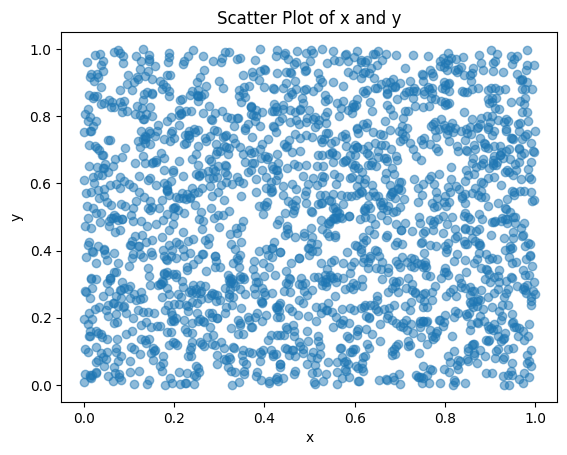

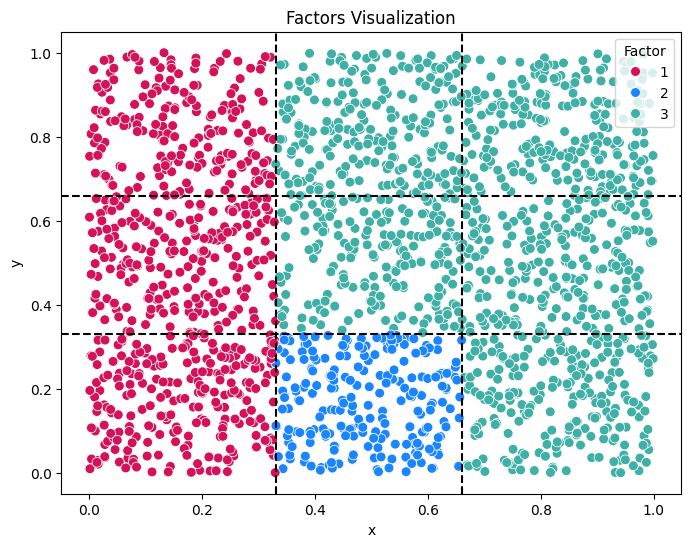

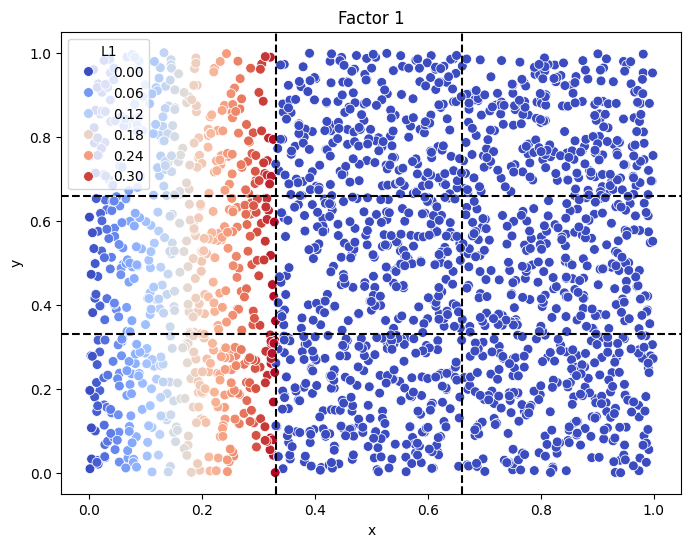

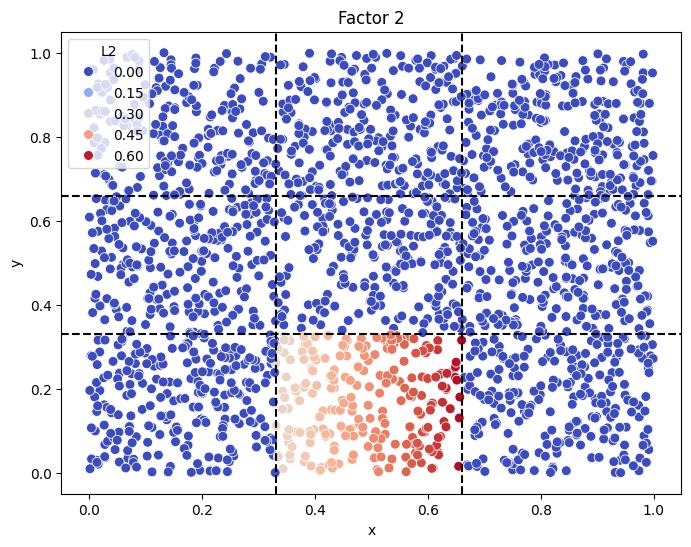

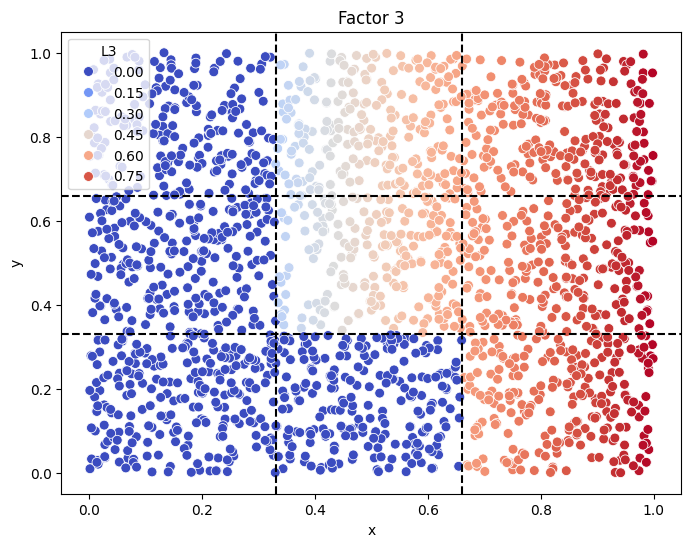

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(1)

# Generate random uniform data
x = np.random.uniform(size=2000)
y = np.random.uniform(size=2000)
X = np.column_stack((x, y))

# Plot the scatter plot of x and y
plt.scatter(x, y, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x and y")
plt.show()

# Generate matrix f
f = np.empty((3, 200))
for i in range(f.shape[1]):
    t1 = np.random.choice([0, 1], size=1)[0]
    t2 = np.random.choice([0, 1], size=1)[0]
    f[0, i] = t1 * np.random.randn()
    f[1, i] = t2 * np.random.randn()
    f[2, i] = t2 * np.random.randn()

# Initialize matrix L and factor array
L = np.empty((len(x), 3))
factor = []

# Populate L and factor arrays
for i in range(len(x)):
    if (x[i] < 0.33  )  :
        L[i, :] = [np.sin  (x[i]), 0, 0]
        factor.append(1)
    elif   (0.33 < x[i] < 0.66 and y[i] < 0.33) :
        L[i, :] = [0, np.sin  (x[i]), 0]
        factor.append(2)
    else:
        L[i, :] = [0, 0,np.sin  (x[i])]
        factor.append(3)

# Convert to DataFrame
df = pd.DataFrame({"x": x, "y": y, "Factor": factor})

# Colors for the plot
colors = ["#D41159", "#1A85FF", "#40B0A6"]

# Plot factor visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette=colors, s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()

# Create individual factor plots
for i in range(3):
    df[f"L{i+1}"] = L[:, i]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x="x",
        y="y",
        hue=f"L{i+1}",
        palette="coolwarm",
        s=50
    )
    plt.axhline(0.33, color="black", linestyle="--")
    plt.axhline(0.66, color="black", linestyle="--")
    plt.axvline(0.33, color="black", linestyle="--")
    plt.axvline(0.66, color="black", linestyle="--")
    plt.title(f"Factor {i+1}") 
    plt.show()

# Generate Z matrix
Z = L @ f + np.random.randn(L.shape[0], f.shape[1])  *2.5


In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF_modular import *

In [9]:
ebmf= cEBMF(data= np.array(Z),
               prior_L= "point_Laplace",
                 prior_F= "point_Laplace", K=3)

In [10]:
ebmf.init_LF()
for i in range(50):
    ebmf.iter()

D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a 

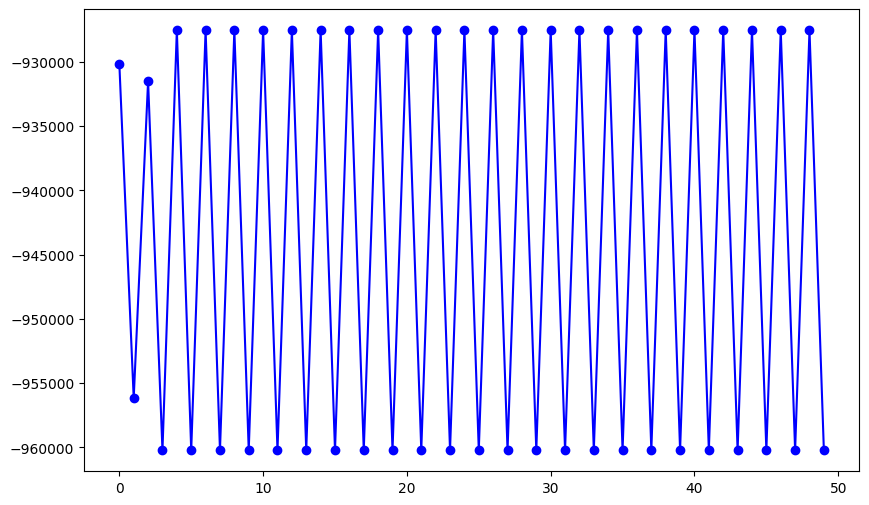

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(ebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [13]:
ebmf.L

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], shape=(2000, 3), dtype=float32)

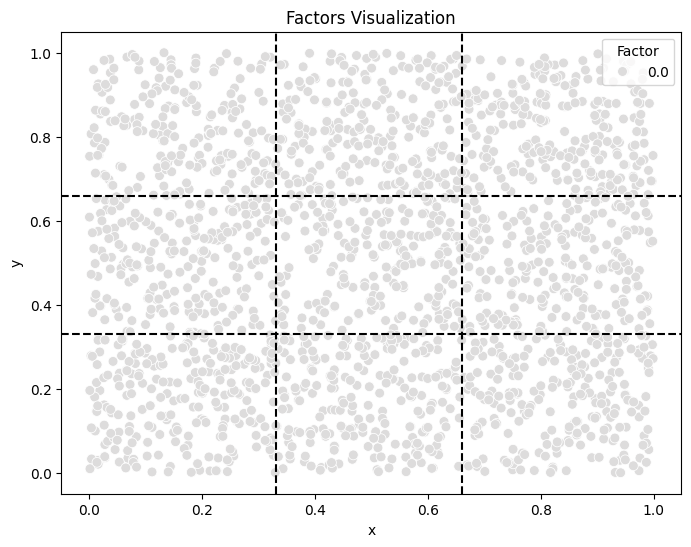

In [14]:

df = pd.DataFrame({"x": x, "y": y, "Factor":ebmf.L[:,0]})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette="coolwarm", s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()


In [15]:
mycebmf_cgb= cEBMF(data= np.array(Z), K=5,
               prior_L= "cgb", 
                 prior_F= "point_Laplace",
               X_l=X )
mycebmf_cgb.init_LF()
for i in range(7):
    mycebmf_cgb.iter()

Epoch 0, Loss: 0.9983084201812744, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6688035130500793, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6959461569786072, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.667973518371582, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 0.6786081790924072, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.10056710243225098, Sigma_2^2: 0.017177211120724678
Epoch 0, Loss: -0.9809632301330566, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.5971382856369019, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.41640105843544006, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.7912319302558899, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:334: RuntimeWarning: overflow encountered in exp
  dlogpnorm_left = -np.exp(-np.log(2 * np.pi) / 2 - xleft**2 / 2 - lpnormleft)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:335: RuntimeWarning: overflow encountered in exp
  dlogpnorm_right = np.exp(-np.log(2 * np.pi) / 2 - xright**2 / 2 - lpnormright)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: invalid value encountered in multiply
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:338: RuntimeWarning: invalid value encountered in multiply
  dgright_da = np.exp(lgright - llik) * (1 / a + a * s**2 - (x - mu) - s * dlogpnorm_right)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: overflow encountered in scalar power


Epoch 0, Loss: -0.15399432182312012, Sigma_2^2: 0.008885161019861698
Epoch 0, Loss: -1.0409843921661377, Sigma_2^2: 0.00021834767539985478
Epoch 0, Loss: -0.5387306809425354, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 6.401572227478027, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:334: RuntimeWarning: overflow encountered in exp
  dlogpnorm_left = -np.exp(-np.log(2 * np.pi) / 2 - xleft**2 / 2 - lpnormleft)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:335: RuntimeWarning: overflow encountered in exp
  dlogpnorm_right = np.exp(-np.log(2 * np.pi) / 2 - xright**2 / 2 - lpnormright)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: invalid value encountered in multiply
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:338: RuntimeWarning: invalid value encountered in multiply
  dgright_da = np.exp(lgright - llik) * (1 / a + a * s**2 - (x - mu) - s * dlogpnorm_right)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: overflow encountered in scalar power


Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.16385045647621155, Sigma_2^2: 0.007420129142701626
Epoch 0, Loss: -1.0246858596801758, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.5134924054145813, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:338: RuntimeWarning: divide by zero encountered in scalar divide
  dgrigh

Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.16737611591815948, Sigma_2^2: 0.006945829372853041
Epoch 0, Loss: -0.999238133430481, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.4787236154079437, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a 

Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:334: RuntimeWarning: overflow encountered in exp
  dlogpnorm_left = -np.exp(-np.log(2 * np.pi) / 2 - xleft**2 / 2 - lpnormleft)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:335: RuntimeWarning: overflow encountered in exp
  dlogpnorm_right = np.exp(-np.log(2 * np.pi) / 2 - xright**2 / 2 - lpnormright)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: invalid value encountered in multiply
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:338: RuntimeWarning: invalid value encountered in multiply
  dgright_da = np.exp(lgright - llik) * (1 / a + a * s**2 - (x - mu) - s * dlogpnorm_right)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  l

Epoch 0, Loss: -0.16528066992759705, Sigma_2^2: 0.006901391316205263
Epoch 0, Loss: -0.9579315781593323, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.4426076114177704, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:214: RuntimeWarning: overflow encountered in exp
  return w / (w + (1 - w) * np.exp(lf - lg))


Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:315: RuntimeWarning: divide by zero encountered in log
  llik = logscale_add(np.log(1 - w) + lf, np.log(w) + lg)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a 

Epoch 0, Loss: -0.16661666333675385, Sigma_2^2: 0.006709663197398186
Epoch 0, Loss: -0.922603189945221, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: -0.4022013247013092, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07
Epoch 0, Loss: 10.1290283203125, Sigma_2^2: 9.999999974752427e-07


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:304: RuntimeWarning: divide by zero encountered in log
  lgleft = np.log(a / 2) + s**2 * a**2 / 2 + a * (x - mu) + lpnormleft
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:309: RuntimeWarning: divide by zero encountered in log
  lgright = np.log(a / 2) + s**2 * a**2 / 2 - a * (x - mu) + lpnormright
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:268: RuntimeWarning: invalid value encountered in subtract
  return max_log + np.log(np.exp(logx - max_log) + np.exp(logy - max_log))
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:337: RuntimeWarning: divide by zero encountered in scalar divide
  dgleft_da = np.exp(lgleft - llik) * (1 / a + a * s**2 + (x - mu) + s * dlogpnorm_left)
D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_point_laplace.py:338: RuntimeWarning: divide by zero encountered in scalar divide
  dgrigh

In [17]:
mycebmf= mycebmf_cgb

In [9]:
mycebmf= cEBMF(data= np.array(Z), K=3,
               prior_L= "emdn",
               X_l=X )
mycebmf.init_LF()
for i in range(7):
    mycebmf.iter()

Epoch 10/50, Loss: 1.1054
Epoch 20/50, Loss: 0.8240
Epoch 30/50, Loss: 0.8011
Epoch 40/50, Loss: 0.7980
Epoch 50/50, Loss: 0.7972
Epoch 10/50, Loss: 0.9270
Epoch 20/50, Loss: 0.6776
Epoch 30/50, Loss: 0.6771
Epoch 40/50, Loss: 0.6762
Epoch 50/50, Loss: 0.6760
Epoch 10/50, Loss: 1.0088
Epoch 20/50, Loss: 0.7133
Epoch 30/50, Loss: 0.7024
Epoch 40/50, Loss: 0.7023
Epoch 50/50, Loss: 0.7018
Epoch 10/50, Loss: 0.2672
Epoch 20/50, Loss: 0.2497
Epoch 30/50, Loss: 0.2429
Epoch 40/50, Loss: 0.2400
Epoch 50/50, Loss: 0.2356
Epoch 10/50, Loss: 2.8925
Epoch 20/50, Loss: 2.8925
Epoch 30/50, Loss: 2.8925
Epoch 40/50, Loss: 2.8925
Epoch 50/50, Loss: 2.8925
Epoch 10/50, Loss: -0.9033
Epoch 20/50, Loss: -0.9486
Epoch 30/50, Loss: -0.9609
Epoch 40/50, Loss: -0.9624
Epoch 50/50, Loss: -0.9633
Epoch 10/50, Loss: 0.2425
Epoch 20/50, Loss: 0.2358
Epoch 30/50, Loss: 0.2327
Epoch 40/50, Loss: 0.2299
Epoch 50/50, Loss: 0.2285
Epoch 10/50, Loss: -1.2465
Epoch 20/50, Loss: -1.3026
Epoch 30/50, Loss: -1.3108
Epoc

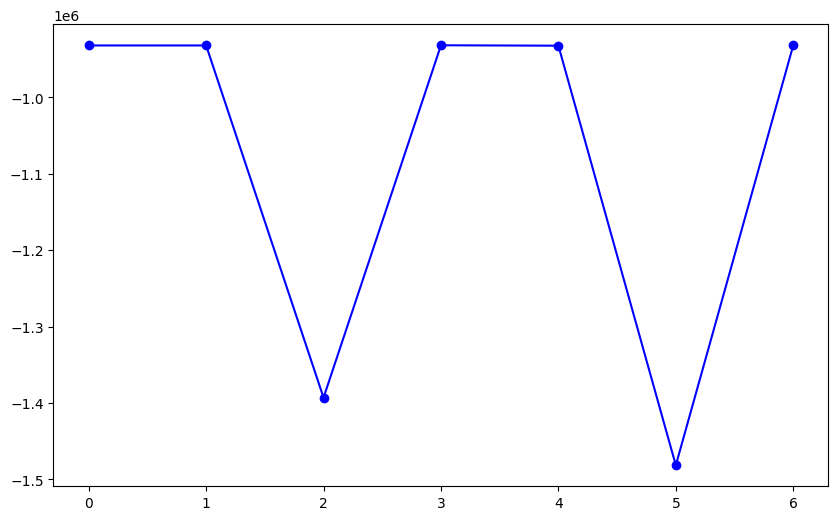

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

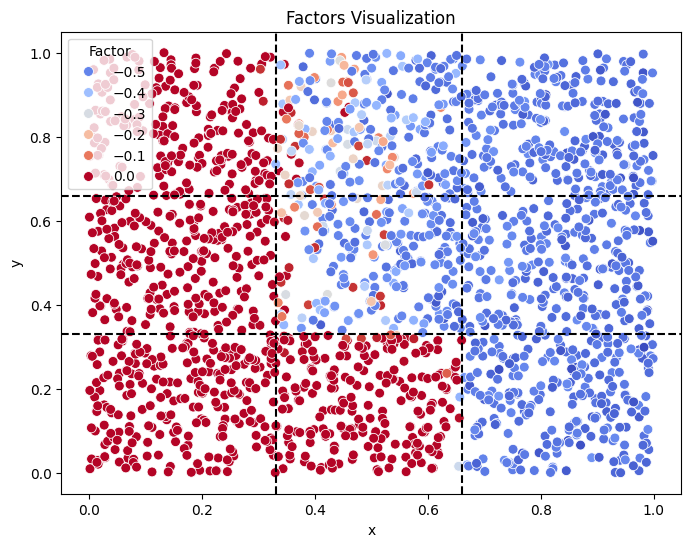

In [19]:

df = pd.DataFrame({"x": x, "y": y, "Factor":mycebmf.L[:,0]})
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="Factor", palette="coolwarm", s=50)
plt.axhline(0.33, color="black", linestyle="--")
plt.axhline(0.66, color="black", linestyle="--")
plt.axvline(0.33, color="black", linestyle="--")
plt.axvline(0.66, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.legend(title="Factor")
plt.show()


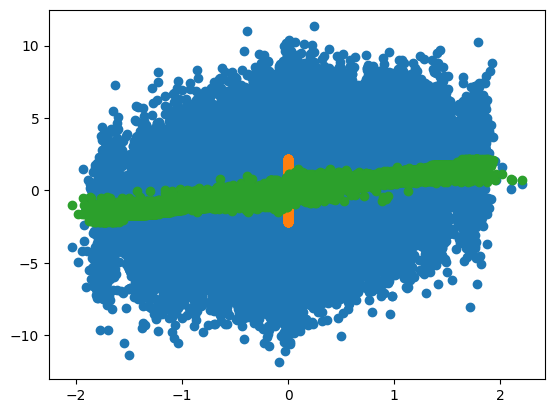

In [20]:
plt.scatter(mycebmf.Y_fit, Z)
 

plt.scatter(ebmf.Y_fit,L @ f )  

plt.scatter(mycebmf.Y_fit,L @ f )  

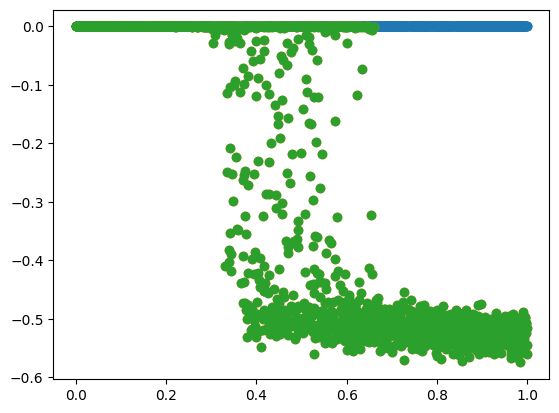

In [21]:

plt.scatter(x, ebmf.L[:,1]) 

plt.scatter(x,mycebmf_cgb.L[:,0]) 
plt.scatter(x,mycebmf.L[:,0]) 

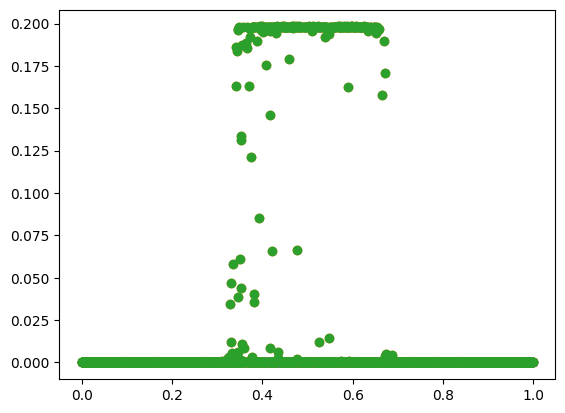

In [22]:

plt.scatter(x, ebmf.L[:,1]) 
plt.scatter(x,mycebmf_cgb.L[:,1]) 
plt.scatter(x,mycebmf.L[:,1]) 

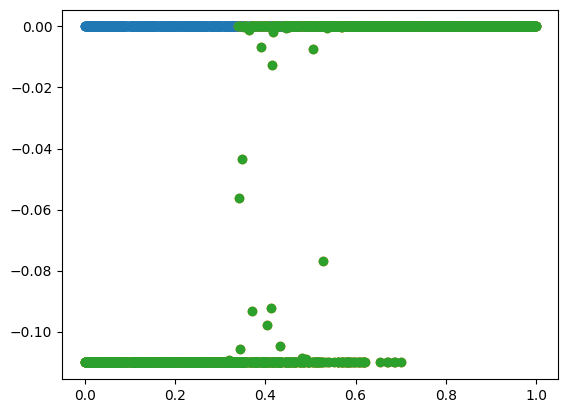

In [23]:
plt.scatter(x, ebmf.L[:,2])
plt.scatter(x,mycebmf_cgb.L[:,2])  
plt.scatter(x,mycebmf.L[:,2]) 

Custom prior

In [27]:

from uni_mod_emdn_loss_corrected import *
def unimod_emdn(X, betahat, sebetahat, model_param):
    res_cash = unimod_emdn_posterior_means(X, betahat,sebetahat, n_epochs=20,  num_classes=5, hidden_dim=64)
    return PriorResult(post_mean=res_cash.post_mean,  post_mean2=res_cash.post_mean2, log_lik=-res_cash.loss)

In [28]:
mycebmfuni= cEBMF(data= np.array(Z), K=3,
               prior_L= unimod_emdn,
               X_l=X )
mycebmfuni.init_LF()
for i in range(7):
    mycebmfuni.iter()

Epoch 10/20, Mean Loss: 716.5945, Variance Loss: 97.1306
Epoch 20/20, Mean Loss: 708.2886, Variance Loss: 96.8212
Epoch 10/20, Mean Loss: 844.5312, Variance Loss: 81.9959
Epoch 20/20, Mean Loss: 874.5024, Variance Loss: 81.8377
Epoch 10/20, Mean Loss: 905.2131, Variance Loss: 85.2315
Epoch 20/20, Mean Loss: 915.6096, Variance Loss: 85.1187
Epoch 10/20, Mean Loss: 26.1938, Variance Loss: 27.0716
Epoch 20/20, Mean Loss: 65.5791, Variance Loss: 23.7928
Epoch 10/20, Mean Loss: 237.3838, Variance Loss: -116.7543
Epoch 20/20, Mean Loss: 243.3471, Variance Loss: -117.0876
Epoch 10/20, Mean Loss: 334.9294, Variance Loss: -99.6543
Epoch 20/20, Mean Loss: 339.9045, Variance Loss: -100.1617
Epoch 10/20, Mean Loss: 508.8114, Variance Loss: 18.3848
Epoch 20/20, Mean Loss: 100.5701, Variance Loss: 16.9100
Epoch 10/20, Mean Loss: 243.5872, Variance Loss: -120.7365
Epoch 20/20, Mean Loss: 245.3910, Variance Loss: -121.4833
Epoch 10/20, Mean Loss: 317.7025, Variance Loss: -102.4968
Epoch 20/20, Mean Lo

KeyboardInterrupt: 

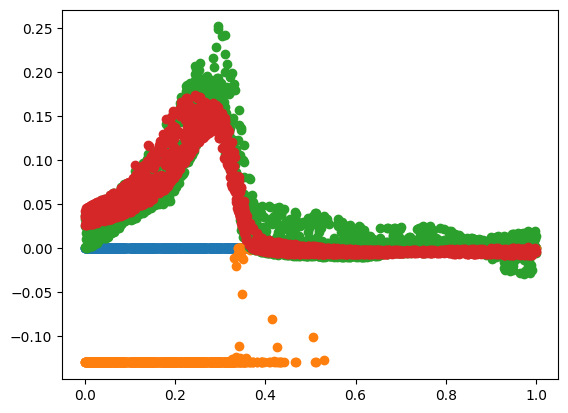

In [29]:
plt.scatter(x, ebmf.L[:,2])
plt.scatter(x,mycebmf_cgb.L[:,2])  
plt.scatter(x,mycebmf.L[:,2]) 
plt.scatter(x, mycebmfuni.L[:,2]) 

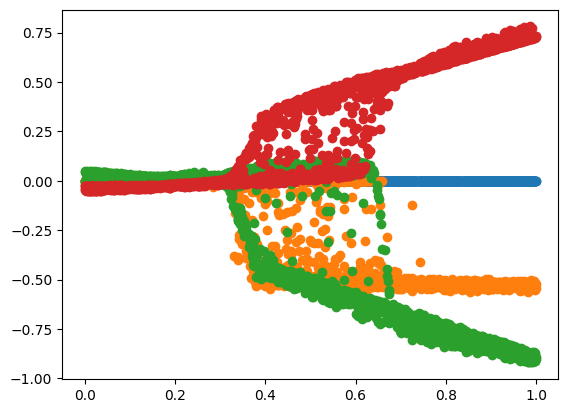

In [30]:
plt.scatter(x, ebmf.L[:,0])
plt.scatter(x,mycebmf_cgb.L[:,0])  
plt.scatter(x,mycebmf.L[:,0]) 
plt.scatter(x, mycebmfuni.L[:,0]) 

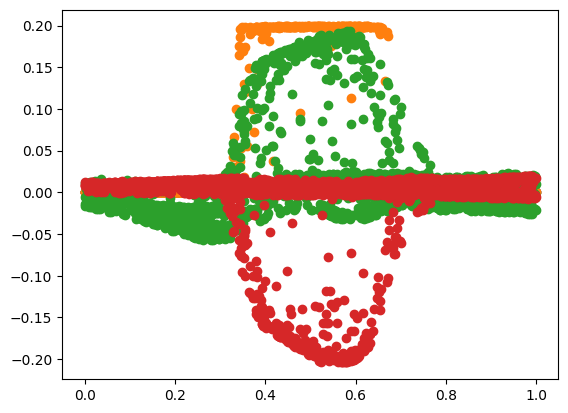

In [31]:
plt.scatter(x, ebmf.L[:,1])
plt.scatter(x,mycebmf_cgb.L[:,1])  
plt.scatter(x,mycebmf.L[:,1]) 
plt.scatter(x, mycebmfuni.L[:,1]) 